### Machine Learning
#### Maximum likelihood estimation (MLE) for multivariate normal (Gaussian) distirbution
Having a sample of $n$ i.i.d. (independent and identically distributed) random vectors from a multivariate normal distribution $N(\boldsymbol{\mu},\Sigma)$, we can estimate its parameters $\boldsymbol{\mu}$ and $\Sigma$ by the **MLE** method. The details are given in the **Pinterest** page mentioned below. In summary, we can estimate the mean vector $\boldsymbol{\mu}$ and coviarance matrix $\Sigma$ by:
<br>
<br> $\boldsymbol{\mu}=\frac{1}{n}\sum_{i=1}^{n}\boldsymbol{x}_i$
<br> $\Sigma=\frac{1}{n}\sum_{i=1}^{n}(\boldsymbol{x}_i-\boldsymbol{\mu})(\boldsymbol{x}_i-\boldsymbol{\mu})^T$
<br>
<br>In the following, we state an example of the MLE for estimating the parameters of the normal distribution from the given samples. Also, we display the ellipse of the estimated convariance matrix along with the samples.
<br>
<Br>https://github.com/ostad-ai/Machine-Learning
<br>Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/background-knowledge

In [1]:
# importing the required modules
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import eig

In [2]:
# example
# parameters of multivariate normal
mean,sigma,n=[1,2],[[2,2],[2,7]],1000
# n sampels taken from the normal distribution
xs=np.random.multivariate_normal(mean,sigma,n)
# lets estimate the parameters by the MLE formulae
mean_hat=1/n*np.sum(xs,axis=0)
sigma_hat=1/n*((xs-mean_hat).T@(xs-mean_hat))
print(f'The real mean vector of samples: {mean}')
print(f'The estimated mean vector of samples: {mean_hat}')
print('-----------------')
print(f'The real covariance matrix of samples:\n {sigma}')
print(f'The estimated covariance matrix of samples:\n {sigma_hat.tolist()}')

The real mean vector of samples: [1, 2]
The estimated mean vector of samples: [0.97276985 2.02631888]
-----------------
The real covariance matrix of samples:
 [[2, 2], [2, 7]]
The estimated covariance matrix of samples:
 [[1.8317566478731837, 1.830567701477496], [1.830567701477496, 6.497817868585885]]


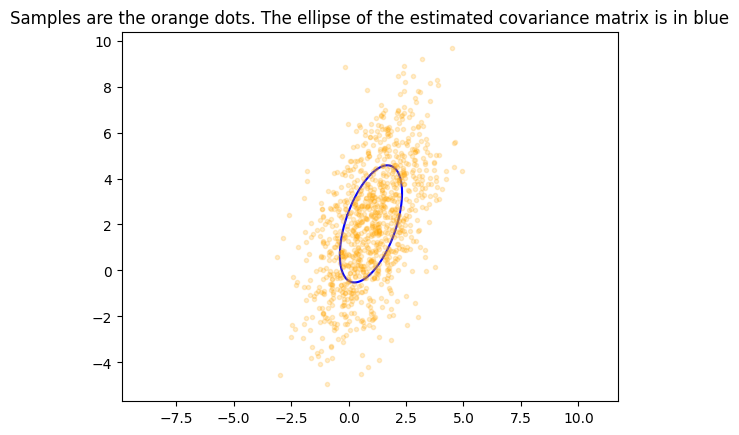

In [3]:
# showing the samples along the ellipse of the estimated covariance amtrix
ts = np.linspace(0, 2*np.pi, 100);
eigvals,eigvecs=eig(sigma_hat)
points = (np.sqrt(eigvals[np.newaxis,:]) * eigvecs) @ [np.cos(ts), np.sin(ts)]
plt.plot(mean_hat[0]+points[0], mean_hat[1]+points[1],c='blue')
plt.plot(xs[:,0],xs[:,1],'.',alpha=.2,c='orange')
plt.title('Samples are the orange dots. The ellipse of the estimated covariance matrix is in blue')
plt.axis('equal')
plt.show()